This Jupyter Notebook focuses on exploring paths within the Twitter/X social network. By examining shortest paths between nodes, we aim to uncover insights into how users are interconnected and the efficiency of information flow across the network. Utilizing the NetworkX library, we will calculate shortest paths, analyze path lengths, and visualize connections to better understand the underlying social dynamics.

Initially, we load the Twitter/X network data, which comprises users as nodes and followings as edges. This step involves creating a graph structure with NetworkX, a powerful library for the creation, manipulation, and study of complex networks. Our graph will serve as the foundation for subsequent analyses of paths within the social network.


In [2]:
import networkx as nx

# Define the file path where you saved the GraphML file
file_path = "/Users/victormpreciado/PythonProjects/Networks/TwitterSmall.graphml"

# Load the directed graph from the GraphML file
X = nx.read_graphml(file_path)

The following code finds the shortest path and the shortest path length between two randomly chosen nodes in a directed graph represented as a NetworkX DiGraph object.

In [5]:
import random
all_nodes = list(X.nodes())
random_node1 = random.choice(all_nodes)
random_node2 = random.choice(all_nodes)

# Ensure that the two nodes are different
while random_node1 == random_node2:
    random_node2 = random.choice(all_nodes)


In [14]:
# Find the shortest path
shortest_path = nx.shortest_path(X, source=random_node1, target=random_node2)

# Find the shortest path length
shortest_path_length = nx.shortest_path_length(X, source=random_node1, target=random_node2)

print("Random Node 1:", random_node1)
print("Random Node 2:", random_node2)
print("Shortest Path between {} and {}: {}".format(random_node1, random_node2, shortest_path))
print("Shortest Path Length between {} and {}: {}".format(random_node1, random_node2, shortest_path_length))

Random Node 1: 95980722
Random Node 2: 139526181
Shortest Path between 95980722 and 139526181: ['95980722', '170729553', '34771668', '74651704', '139526181']
Shortest Path Length between 95980722 and 139526181: 4


Let's take a look at the number of connected components...

In [42]:
import networkx as nx

# Compute strongly connected components (SCCs)
strongly_connected_components = nx.strongly_connected_components(X)

# Count the number of strongly connected components
num_scc = len(list(strongly_connected_components))

# Print the number of strongly connected components
print(f"Number of Strongly Connected Components: {num_scc}")

Number of Strongly Connected Components: 12248


We have many SCCs (over 12K). Let's extract the Giant SCC using the code below.

In [46]:
strongly_connected_components = list(nx.strongly_connected_components(X))

# Find the largest SCC
largest_scc = max(strongly_connected_components, key=len)

# Create the subgraph of X induced by the largest SCC
GSCC = X.subgraph(largest_scc).copy()

# Check if GSCC is strongly connected
is_strongly_connected = nx.is_strongly_connected(GSCC)
print(f"GSCC is strongly connected: {is_strongly_connected}")

GSCC is strongly connected: True


With our graph prepared, we proceed to compute the lengths of the shortest paths for a random subset of pairs of nodes (using a shortest_path_length method provided by NetworkX).

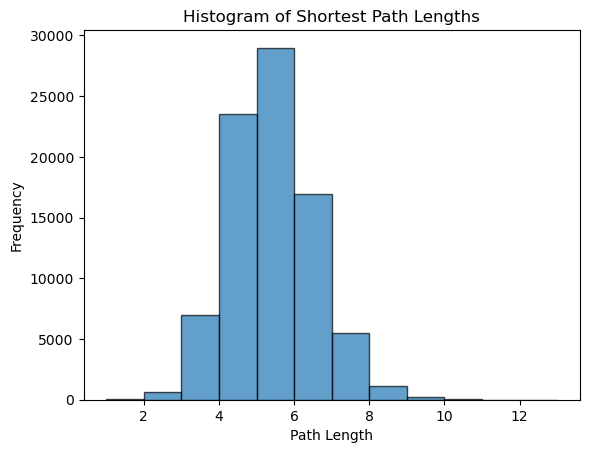

Average Shortest Path Length: 4.917722799376436


In [50]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# Randomly select 10,000 pairs of nodes
num_pairs = 100000
nodes = list(X.nodes())
random_pairs = [random.sample(nodes, 2) for _ in range(num_pairs)]

# Compute the shortest path length for each pair
path_lengths = []
for (u, v) in random_pairs:
    try:
        length = nx.shortest_path_length(X, source=u, target=v)
        path_lengths.append(length)
    except nx.NetworkXNoPath:
        # No path exists between u and v, ignore this pair
        continue

# Plot a histogram of the shortest path lengths
plt.hist(path_lengths, bins=range(min(path_lengths), max(path_lengths) + 1), alpha=0.7, edgecolor='black')
plt.title('Histogram of Shortest Path Lengths')
plt.xlabel('Path Length')
plt.ylabel('Frequency')
plt.show()

# Step 4: Calculate the average shortest path length
average_length = sum(path_lengths) / len(path_lengths)
print(f"Average Shortest Path Length: {average_length}")


Analyzing the distribution of shortest path lengths across the network allows us to understand the "small-world" nature of social networks. We calculate the average shortest path length and visualize the distribution to assess how closely connected the users are, on average. This analysis helps in understanding the overall navigability and connectivity of the social network.